# Do the MuyGPs math with general shaped tensors

## Standard GP math

Observe $n$ values of $Y$: $y_1, y_2, \ldots, y_n$.

Want to predict $m$ values of $Z$: $z_{1'}, z_{2'}, \ldots, z_{m'}$.

(Primed indices will correspond to outputs/predictions and unprimed indices will correspond to input/observed things.)

Ingredients:

<!-- $$
\begin{align}
\mu_i &\equiv \mathrm{E}\left[ Y_i \right] & &(i=1, \ldots, n) \\
\mu_{i'} &\equiv \mathrm{E}\left[ Z_{i'} \right] & &(i'=1, \ldots, m) \\
K_{ij} &\equiv \mathrm{E}\left[ \left(Y_i - \mu_i \right) \left(Y_j - \mu_j \right) \right] & &(i=1, \ldots, n, \, j=1,\ldots,n) \\
K_{i{j'}} &\equiv \mathrm{E}\left[ \left(Y_i - \mu_i \right) \left(Z_{j'} - \mu_{j'} \right) \right]  \equiv K_{{j'}i} & &(i=1, \ldots, n, \, j'=1,\ldots,m) \\
K_{{i'}{j'}} &\equiv \mathrm{E}\left[ \left(Z_{i'} - \mu_{i'} \right) \left(Z_{j'} - \mu_{j'} \right) \right] & &(i'=1, \ldots, m, \, j'=1,\ldots,m)
\end{align}
$$
 -->
$$
\mu_i \equiv \mathrm{E}\left[ Y_i \right] \quad\quad (i=1, \ldots, n) \\
\mu_{i'} \equiv \mathrm{E}\left[ Z_{i'} \right]  \quad\quad (i'=1, \ldots, m) \\
K_{ij} \equiv \mathrm{E}\left[ \left(Y_i - \mu_i \right) \left(Y_j - \mu_j \right) \right]  \quad\quad (i=1, \ldots, n, \, j=1,\ldots,n) \\
K_{i{j'}} \equiv \mathrm{E}\left[ \left(Y_i - \mu_i \right) \left(Z_{j'} - \mu_{j'} \right) \right]  \equiv K_{{j'}i}  \quad\quad (i=1, \ldots, n, \, j'=1,\ldots,m) \\
K_{{i'}{j'}} \equiv \mathrm{E}\left[ \left(Z_{i'} - \mu_{i'} \right) \left(Z_{j'} - \mu_{j'} \right) \right]  \quad\quad (i'=1, \ldots, m, \, j'=1,\ldots,m)
$$


The conditional mean of $Z_{i'}$ given the observed $y_1, \ldots y_n$ is (in all these equations repeated indices are summed over),

$$
\hat{z}_{i'} = \mu_{i'} + \left(y_k-\mu_k \right) F_{k i'},
$$

and the conditional covariance between $Z_{i'}$ and $Z_{j'}$ given the observed $y_1, \ldots y_n$ is,

$$
S_{i'j'} = K_{i'j'} - K_{i'k} F_{k j'}.
$$

The quantities $F_{k i'}$ are constants whose defining equations are,

$$
K_{ik} F_{k j'}= K_{i j'}.
$$

Finding $F$ is the "solve" that occurs in the GP math.


<!-- The linear unbiased estimate of $Z_{i'}$ given observed $y_1, \ldots y_n$ is,
$$
\hat{z}_{i'} = \mu_{i'} + F_{i' j} \left(y_j-\mu_j \right),
$$
for some constant matrix $F_{i'j}$ (in all these equations repeated indices are summed over).

Set $F_{i'j}$ by minimizing the variance of the residual $r_{i'} \equiv \hat{z}_{i'} - z_{i'}$ (a.k.a. the standard error $S_{i'i'}$ of the estimator),
\begin{align}
S_{i'j'} \equiv \mathrm{E}\left[r_{i'}r_{j'} \right] &=  \mathrm{E}\left[ \left(F_{i' k} \left(Y_k-\mu_k \right) - \left(Z_{i'}-\mu_{i'}\right)\right) \left(F_{j' l} \left(Y_l-\mu_l \right) - \left(Z_{j'}-\mu_{j'}\right)\right) \right], \\
&= F_{i' k} F_{j' l} K_{kl} - F_{i' k} K_{k{j'}} - K_{{i'}l} F_{j'l} + K_{i'j'}.
\end{align}

The variation with respect to $F_{a'b}$ is,
\begin{align}
\frac{\partial S_{i'j'}}{\partial F_{a'b}} &= \delta_{i' a'} F_{j' l} K_{bl} + \delta_{j' a'} F_{i'k} K_{kb}
-\delta_{i' a'} K_{b j'} - K_{i'b} \delta_{j'a'}.
\end{align}

We want this to be zero for all $i'$, $a'$, and $b$ with $i'=j'$. When $i'=j'$ it's a nontrivial equation only if $a'=i'=j'$. In this case,
\begin{align}
0 &= \frac{\partial S_{i'i'}}{\partial F_{i'b}} = F_{i' l} K_{bl} + F_{i'k} K_{kb} - K_{b i'} - K_{i'b},\\
  &= F_{i' k} K_{kb} - K_{b i'}.
\end{align}

This is the defining equation for $F_{i'j}$,
$$
F_{i'k} K_{kj} = K_{i' j}.
$$

Inserting this back into the covariance of the residual gives,
\begin{align}
S_{i'j'} &= K_{i'l} F_{j' l} - F_{i' k} K_{k{j'}} - K_{{i'}l} F_{j'l} + K_{i'j'},\\
&= K_{i'j'} - F_{j'k} K_{i'k}.
\end{align}

If $\mathbf{Y}$ and $\mathbf{Z}$ are jointly Gaussian distributed then the conditional distribution of $\mathbf{Z}$ given $\mathbf{y}$ is also Gaussian and the mean and covariance of this conditional distribution are $\hat{\mathbf{z}}$ and $S$. -->

## With tensor inputs and outputs

Note that no meaning was given to any of the indices $i$ and $i'$ above. We can imagine these indices as multi-indices which range over the various $x$-values where $y_i$ and $z_{i'}$ are "located" as well as over the vector or tensor components of the $y$ and $z$ objects.

For example, $i$ might be shorthand for $(i_1, i_2, i_3)$ and when you sum over $i$ in any equation above you sum over all possible combinations of $i_1$, $i_2$, and $i_3$. Maybe $y_i$ is a matrix observed at various locations. Then $i_1$ could index the nearest neighbors $x_{i_1}$ while $i_2$ and $i_3$ index the row and column of the matrix $y_{i_1}$ observed at $x_{i_1}$.

### Batching

The batching means that we are doing $b$ completely separate calculations (where $b$ is the batch size). In MuyGPs, each batch contains a single target point $x′$ and its $k$ nearest neighbors $x_1, \ldots x_k$.


### Ordering of the multi-indices
The batch indices will come first, followed by indices corresponding to the observations $y$, followed by indices corresponding to the outputs $z$.

We can have complete generality in terms of tensor shapes. We don't need to have a single dimension for the batch. We also can have multiple target points $x'$ per batch (at the expense of larger cross covariance tensors). The $y$'s and $z$'s can have any number of dimensions or they can be scalars with no dimension.

See the documentation for the functions below.

In [1]:
import numpy as np
import math

In [2]:
def posterior_mean(y, Kin, Kcross):
    '''
    Compute the GP posterior mean given observations y and covariances between y and the output z.
    
    y : array of shape (b_1, ..., b_b, i_1, ..., i_n)
        The observations (actually the observations minus their prior means)
        b_1 to b_b are batch dimensions, i_1 to i_n correspond to the observed y object,
        e.g. if you observe a 3-vector at each of 10 x-values and you have a batch size of 100
        the shape of y could be (100, 10, 3) and y[3, 7, :] would be the observed vector
        y at location x_7 in batch 3.
          
    Kin : array of shape (b_1, ..., b_b, i_1, ..., i_n, i_1, ... i_n)
          The covariance among the observations (usually a kernel plus a nugget).
          In the example above Kin[3, 4, 1, 8, 0] is the covariance between the 1st component of 
          the vector y(x_4) and the 0th component of the vector y(x_8).
          Kin has a "square" shape.
          
    Kcross : array of shape (b_1, ..., b_b, i_1, ..., i_n, j_1, ..., j_m)
             The cross covariance between the inputs and outputs.
             e.g. if you are predicting the value of the GP at 3 target points x'
             and you are predicting a 2-vector at each of those points then
             (j_1, ..., j_m) could be (3, 2).
    
    The batch shape (b_1, ..., b_b) and/or the output tensor shape (j_1, ..., j_m) can be absent.
      I.e. you could give y : (10,), Kin : (10,10), and Kcross : (10,) to do a single GP prediction
      from 10 observed values to a single target point.
      Or you could do the same but with Kcross : (10,3) to use the 10 observed values to predict
      at 3 target points.
    
    Returns
    z : array of shape (b_1, ..., b_b, j_1, ..., j_m)
        The posterior mean given y (actually the posterior mean of z minus its prior mean).
        In the example above with one batch dimension and (j_1, ..., j_m) = (3,2), 
        z[30, 0, 1] corresponds to the prediction of the 1st
        component of the output vector z at location x'[0].
    '''
    
    #np.linalg.solve does almost exactly what we want but it needs the dimensions summed
    # over in matrix multiplication to be 1d. So we have to unravel i_1, ... i_n into a
    # single dimension, and similarly for j_1, ..., j_m
    
    #first figure out what indices correspond to batch, input, and output
    inshape = Kin.shape[y.ndim:] #(i_1, ..., i_n)
    outshape = Kcross.shape[y.ndim:] #(j_1, ..., j_m)
    batchshape = y.shape[:-len(inshape)] #(b_1, ..., b_b)
    
    insize = math.prod(inshape)
    outsize = math.prod(outshape)
    
    y_flatT = y.reshape(batchshape + (1,insize,)) # stack of row vectors y
    Kin_flat = Kin.reshape(batchshape + (insize,insize))
    Kcross_flat = Kcross.reshape(batchshape + (insize,outsize))
    
    F_flat = np.linalg.solve(Kin_flat, Kcross_flat) #shape = (b_1, ..., b_b, insize, outsize)
    z = y_flatT @ F_flat #(b_1, ..., b_b, 1, outsize)
    return z.reshape(batchshape + outshape) #(b_1, ..., b_b, j_1, ..., j_m)


def posterior_covariance(Kin, Kcross, Kout, nbatchdims):
    '''
    Compute the GP posterior mean given observations y and covariances between y and the output z.
    
    Kin : array of shape (b_1, ..., b_b, i_1, ..., i_n, i_1, ... i_n)
          The covariance among the observations (usually a kernel plus a nugget).
          
    Kcross : array of shape (b_1, ..., b_b, i_1, ..., i_n, j_1, ..., j_m)
             The cross covariance between the inputs and outputs.
    
    Kout : array of shape (b_1, ..., b_b, j_1, ... j_m, j_1, ..., j_m)
           The prior covariance among the outputs.
           E.g. if you are predicting the components of a 3-vector at 5 output 
           locations x' and doing this independently for a batch of size 100 then
           Kout could have shape (100, 5, 3, 5, 3).
    
    nbatchdims : int, length of (b_1, ..., b_b) 
                (unfortunately, you can't figure this out from the shapes of
                 Kin, Kcross, and Kout)
    
    Returns
    Kpost : array of shape (b_1, ..., b_b, j_1, ..., j_m, j_1, ..., j_m)
        The posterior variance given y.
    '''
    nindims = (Kin.ndim-nbatchdims)//2
    
    batchshape = Kin.shape[:nbatchdims] #(b_1, ..., b_b)
    inshape = Kin.shape[nbatchdims+nindims:] #(i_1, ..., i_n)
    outshape = Kcross.shape[nbatchdims+nindims:] #(j_1, ..., j_m)
    
    insize = math.prod(inshape)
    outsize = math.prod(outshape)
    
    Kin_flat = Kin.reshape(batchshape + (insize,insize))
    Kcross_flat = Kcross.reshape(batchshape + (insize,outsize))
    
    F_flat = np.linalg.solve(Kin_flat, Kcross_flat) #shape = (b_1, ..., b_b, insize, outsize)
    
    Kpost = F_flat.swapaxes(-2, -1) @ Kcross_flat # (b_1, ..., b_b, outsize, outsize)
    return Kout - Kpost.reshape(batchshape + outshape + outshape)

### note
It doesn't really make sense to call posterior_mean and posterior_covariance separately and do the solve for F_flat twice. If you combined them you also wouldn't have to pass in the nbatchdims arg to posterior_covariance.

In [3]:
def posterior_mean_covariance(y, Kin, Kcross, Kout):
    '''
    Compute the GP posterior mean given observations y and covariances between outputs z given y.
    
    y : array of shape (b_1, ..., b_b, i_1, ..., i_n)
        The observations (actually the observations minus their prior means)
        b_1 to b_b are batch dimensions, i_1 to i_n correspond to the observed y object,
        e.g. if you observe a 3-vector at each of 10 x-values and you have a batch size of 100
        the shape of y could be (100, 10, 3) and y[3, 7, :] would be the observed vector
        y at location x_7 in batch 3.
          
    Kin : array of shape (b_1, ..., b_b, i_1, ..., i_n, i_1, ... i_n)
          The covariance among the observations (usually a kernel plus a nugget).
          In the example above Kin[3, 4, 1, 8, 0] is the covariance between the 1st component of 
          the vector y(x_4) and the 0th component of the vector y(x_8).
          Kin has a "square" shape.
          
    Kcross : array of shape (b_1, ..., b_b, i_1, ..., i_n, j_1, ..., j_m)
             The cross covariance between the inputs and outputs.
             e.g. if you are predicting the value of the GP at 3 target points x'
             and you are predicting a 2-vector at each of those points then
             (j_1, ..., j_m) could be (3, 2).
    
    Kout : array of shape (b_1, ..., b_b, j_1, ... j_m, j_1, ..., j_m)
           The prior covariance among the outputs.
           E.g. if you are predicting the components of a 3-vector at 5 output 
           locations x' and doing this independently for a batch of size 100 then
           Kout could have shape (100, 5, 3, 5, 3).
    
    The batch shape (b_1, ..., b_b) and/or the output tensor shape (j_1, ..., j_m) can be absent.
      I.e. you could give y : (10,), Kin : (10,10), and Kcross : (10,) to do a single GP prediction
      from 10 observed values to a single target point.
      Or you could do the same but with Kcross : (10,3) to use the 10 observed values to predict
      at 3 target points.
    
    Returns
    mu : array of shape (b_1, ..., b_b, j_1, ..., j_m)
         The posterior mean given y (actually the mean of z minus its prior mean).
         In the example above with one batch dimension and (j_1, ..., j_m) = (3,2), 
         z[30, 0, 1] corresponds to the prediction of the 1st
         component of the output vector z at location x'[0].
    
    Kpost : array of shape (b_1, ..., b_b, j_1, ..., j_m, j_1, ..., j_m)
            The posterior variance given y.
    '''
    
    #np.linalg.solve does almost exactly what we want but it needs the dimensions summed
    # over in matrix multiplication to be 1d. So we have to unravel i_1, ... i_n into a
    # single dimension, and similarly for j_1, ..., j_m
    
    #first figure out what indices correspond to batch, input, and output
    inshape = Kin.shape[y.ndim:] #(i_1, ..., i_n)
    outshape = Kcross.shape[y.ndim:] #(j_1, ..., j_m)
    batchshape = y.shape[:-len(inshape)] #(b_1, ..., b_b)
    
    insize = math.prod(inshape)
    outsize = math.prod(outshape)
    
    y_flatT = y.reshape(batchshape + (1,insize,)) # stack of row vectors y
    Kin_flat = Kin.reshape(batchshape + (insize,insize))
    Kcross_flat = Kcross.reshape(batchshape + (insize,outsize))
    
    F_flat = np.linalg.solve(Kin_flat, Kcross_flat) #shape = (b_1, ..., b_b, insize, outsize)
    
    z = y_flatT @ F_flat #(b_1, ..., b_b, 1, outsize)
    z = z.reshape(batchshape + outshape) #(b_1, ..., b_b, j_1, ..., j_m)
    
    Kpost = F_flat.swapaxes(-2, -1) @ Kcross_flat # (b_1, ..., b_b, outsize, outsize)
    Kpost = Kout - Kpost.reshape(batchshape + outshape + outshape)
    return z, Kpost

The above functions should work for the usual case of a scalar GP.

In that case,
```
(i_1, ..., i_n) = (nn_count,),
(j_1, ..., j_m) is an empty tuple,
(b_1, ..., b_b) = (batch_count,).
```
Then the above functions expect these tensor shapes:
```
  Kin    : (batch_count, nn_count, nn_count)
  Kcross : (batch_count, nn_count)
  y      : (batch_count, nn_count)
  Kout   : (batch_count,)
```
and they will return:
```
 z     : (batch_count,)
 Kpost : (batch_count,)
```

Therefore, I think the above `posterior_mean` and `posterior_covariance` functions can possibly replace the `_muygps_posterior_mean` and `_muygps_diagonal_variance` functions in muygpys.

## test that shapes work

In [4]:
# usual scalar GP predicting at a single target point in each batch
batch_count = 100
nn_count = 30

y = np.random.rand(batch_count, nn_count)
Kin = np.random.rand(batch_count, nn_count, nn_count)
Kin = Kin @ Kin.swapaxes(-2,-1)
Kcross = np.random.rand(batch_count, nn_count)
Kout = np.random.rand(batch_count)


assert posterior_mean(y, Kin, Kcross).shape == (batch_count,)
assert posterior_covariance(Kin, Kcross, Kout, 1).shape == (batch_count,)

In [5]:
# scalar GP predicting at several target points in each batch
batch_count = 100
nn_count = 30
target_count = 3

y = np.random.rand(batch_count, nn_count)
Kin = np.random.rand(batch_count, nn_count, nn_count)
Kin = Kin @ Kin.swapaxes(-2,-1)
Kcross = np.random.rand(batch_count, nn_count, target_count)
Kout = np.random.rand(batch_count, target_count, target_count)


assert posterior_mean(y, Kin, Kcross).shape == (batch_count, target_count)
assert posterior_covariance(Kin, Kcross, Kout, 1).shape == (batch_count, target_count, target_count)

In [6]:
# vector-valued GP predicting a vector at single target point in each batch
batch_count = 100
nn_count = 30
response_count = 3

y = np.random.rand(batch_count, nn_count, response_count)
Kin = np.random.rand(batch_count, nn_count*response_count, nn_count*response_count)
Kin = (Kin @ Kin.swapaxes(-2,-1)).reshape(batch_count, nn_count, response_count, nn_count, response_count)
Kcross = np.random.rand(batch_count, nn_count, response_count, response_count)
Kout = np.random.rand(batch_count, response_count, response_count)


assert posterior_mean(y, Kin, Kcross).shape == (batch_count, response_count)
assert posterior_covariance(Kin, Kcross, Kout, 1).shape == (batch_count, response_count, response_count)

# example of a 2d GP

Observe the gradient of a GP with squared exp kernel and zero mean.

$$
K^{ij}(x_1,x_2)= \frac{\sigma^2}{l^2} \exp\left[-\frac{1}{2l} \lVert x_1-x_2 \rVert^2 \right] \left( \delta^{ij} - \frac{(x_1^i-x_2^i)(x_1^j-x_2^j)}{l^2} \right).
$$

For the vector-valued function $f^i(x)$, $K^{ij}(x_1,x_2)$ is the covariance between the the $i$-th component of the vector at location $x_1$ and the $j$-th component of the vector at $x_2$.

In [7]:
import scipy.stats
import matplotlib.pyplot as plt

In [8]:
def kernelfunc(x1, x2, sigma=1, l=1):
    '''
    x1 : array of shape (n,d) meaning n x-values living in a d-dimensional space
    x2 : array of shape (m,d)
    
    Returns
    K : (n,d,m,d), where K[a,i,b,j] the covariance between the ith component of x1[a] and the jth component of x2[b]
    '''
    n,d = x1.shape
    m,d = x2.shape
    
    diffs = np.empty((n,d,m,d), dtype=np.float64)
    for i in range(d):
        for j in range(d):
            diffs[:,i,:,j] = (x1[:,i].reshape(-1,1)-x2[:,i].reshape(1,-1)) * (x1[:,j].reshape(-1,1)-x2[:,j].reshape(1,-1))
    
    dsq = sum([diffs[:,i,:,i] for i in range(d)]) #(n,m)
    
    eye = np.zeros((n,d,m,d), dtype=np.float64)
    for i in range(d):
        eye[:,i,:,i] = 1
        
    K = (sigma**2/l**2) * np.exp(-1/(2*l**2) * dsq[:,None,:,None]) * (eye - diffs/l**2)
    return K

In [9]:
sigma = 10
l = 7
noise = 0.3

n_train = 50 

x_train = 10*np.random.rand(n_train, 2)

In [10]:
Kin = kernelfunc(x_train, x_train, sigma, l) #(ntrain,2,ntrain,2)

In [11]:
mvn = scipy.stats.multivariate_normal(mean=np.zeros(2*n_train), cov=Kin.reshape(n_train*2,n_train*2), allow_singular=True)

In [12]:
sigma = 10
l = 7
noise = 0.3

n_train = 50 

x_train = 10*np.random.rand(n_train, 2)

Kin = kernelfunc(x_train, x_train, sigma, l) #(ntrain,2,ntrain,2)

# observations y_train
mvn = scipy.stats.multivariate_normal(mean=np.zeros(2*n_train), cov=Kin.reshape(n_train*2,n_train*2), allow_singular=True)
z_train = mvn.rvs().reshape(n_train, 2)

#add noise
y_train = z_train + np.random.randn(n_train, 2)*noise #batch size is zero and (i_1, ..., i_n) = (n_train, 2)

nugget = noise**2*np.eye(n_train*2).reshape(n_train,2,n_train,2)
Kin = Kin + nugget


In [13]:
#make predictions at a grid of points: (j_1, ..., j_m) = (g,g,2)
g = 5 # grid size
x_target = np.empty((g,g,2))
x_target[:,:,0] = np.linspace(0,10,g).reshape(1,-1)
x_target[:,:,1] = np.linspace(0,10,g).reshape(-1,1)

Kcross = kernelfunc(x_train, x_target.reshape(-1,2), sigma, l).reshape(n_train, 2, g, g, 2)

Kout = kernelfunc(x_target.reshape(-1,2), x_target.reshape(-1,2), sigma, l).reshape(g, g, 2, g, g, 2)

In [14]:
z_pred = posterior_mean(y_train, Kin, Kcross) #(g,g,2)
z_predcov = posterior_covariance(Kin, Kcross, Kout, nbatchdims=0) #(g,g,2, g,g,2)

In [15]:
#generate 20 posterior samples for each output vector (full covariance between all output vectors in the grid)
mvnpost = scipy.stats.multivariate_normal(mean=z_pred.reshape(z_pred.size), cov=z_predcov.reshape(z_pred.size,z_pred.size), allow_singular=True)
zsamp = mvnpost.rvs(size=20).reshape((-1,)+z_pred.shape) #(20, g,g,2)

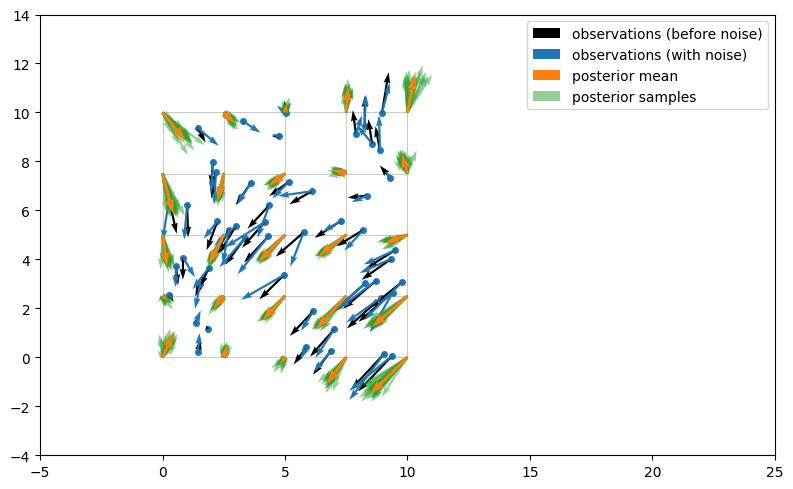

In [16]:
plt.figure(figsize=(9,5))

plt.plot(x_train[:,0], x_train[:,1], 'o', ms=4, zorder=1)
plt.quiver(x_train[:,0], x_train[:,1], z_train[:,0], z_train[:,1], 
           angles='xy', zorder=2, scale=1, scale_units='xy', color='k', width=0.003, label='observations (before noise)')
plt.quiver(x_train[:,0], x_train[:,1], y_train[:,0], y_train[:,1], 
           angles='xy', zorder=2, scale=1, scale_units='xy', color='C0', width=0.003, label='observations (with noise)')

# plt.plot(x_target[:,:,0].ravel(), x_target[:,:,1].ravel(), 'o', ms=4, mfc='none', color='C1')
plt.quiver(x_target[:,:,0], x_target[:,:,1], z_pred[:,:,0], z_pred[:,:,1],
           angles='xy', zorder=3, scale=1, scale_units='xy', color='C1', width=0.004, label='posterior mean')
           

for i in range(zsamp.shape[0]):
    plt.quiver(x_target[:,:,0], x_target[:,:,1], zsamp[i,:,:,0], zsamp[i,:,:,1],
               angles='xy', zorder=2.5, scale=1, scale_units='xy', color='C2', width=0.003, alpha=0.5,
               label='posterior samples' if i==0 else None)
           
plt.hlines(x_target[:,0,1], x_target[0,0,0], x_target[0,-1,0], color='0.7', lw=0.5, zorder=0.5)
plt.vlines(x_target[0,:,0], x_target[-1,0,1], x_target[0,0,1], color='0.7', lw=0.5, zorder=0.5)
    
plt.gca().set_aspect('equal')
plt.legend()
plt.xlim(-5,25)
plt.ylim(-4,14)
plt.tight_layout()